In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the dataframe into pandas dataframe

In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#shape of the data
data.shape

(1338, 7)

So, there are 1338 observations and 7 columns are available in the dataset.

In [4]:
data.duplicated().sum()

1

In [5]:
data=data.drop_duplicates()


In [6]:
#Datatype of Attributes
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#Checking missing values
data.isnull().values.any()

False

shows True==> if any missing values is there.

      False==> if any missing values is not there.
      
Here, Dataset has no missing Values.

In [8]:
# it gives total number of non null entries in the dataframe
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#5 point summary of numerical attributes
des_data=data.describe().T
des_data

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


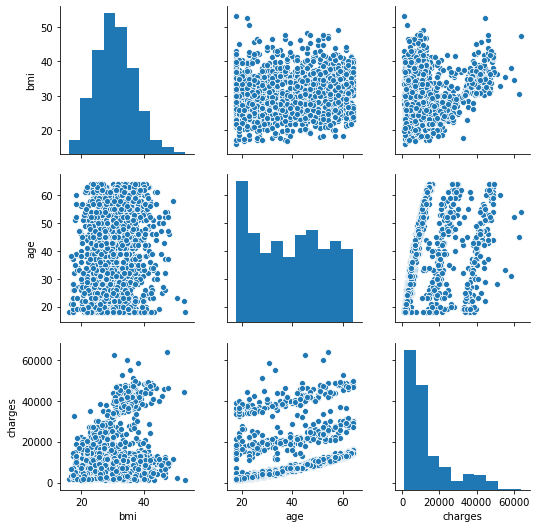

In [10]:
# Distribution of bmi,age, charges columns.
data1=data[["bmi","age","charges"]]
sns.pairplot( data1)

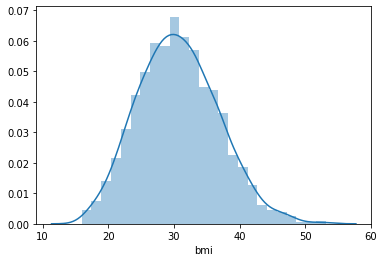

In [11]:
sns.distplot(data1["bmi"])

The curve shows the density plot which is a smooth version of the histogram. The y-axis is in terms of density and the histogram is normalized by default.

Text(0.5, 1.0, 'Different age groups:')

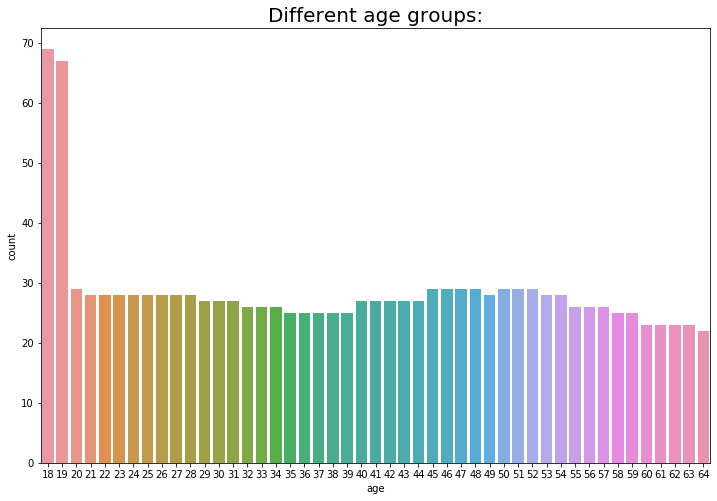

In [12]:
plt.figure(figsize = (12,8))
cnt=sns.countplot(x="age",data=data1)
cnt.set_title("Different age groups:",fontsize=20)


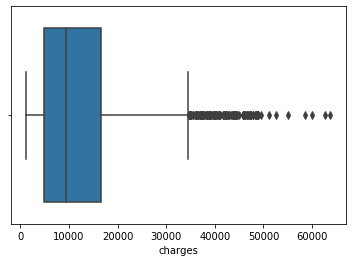

In [13]:
sns.boxplot("charges",data=data1)

The shape of the charges is right skewed Distribution.

In [14]:
corr=data1.corr()
corr

,bmi,age,charges
bmi,1.000000,0.109344,0.198401
age,0.109344,1.000000,0.298308
charges,0.198401,0.298308,1.000000


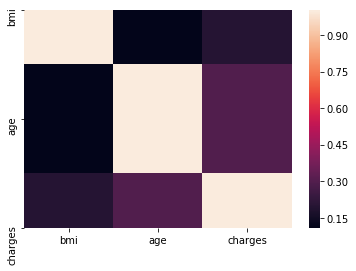

In [15]:
sns.heatmap(corr)

The above correlation value informs that there is a comparatively strong relationship exists between age & charges.

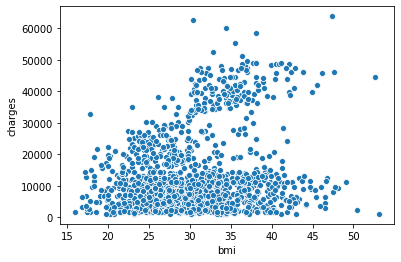

In [16]:
sns.scatterplot(x=data1['bmi'], y=data1['charges'])

The scatterplot above suggests that body mass index (BMI) and charges are positively correlated.

In [17]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
data1.skew()

bmi        0.283914
age        0.054781
charges    1.515391
dtype: float64

When, Skewness=0 ==>normal distribution

      Skewness>0 ==>positively skewed distribution/Right skewed Distribution. (has a long right tail).
    
      Skewness<0==>negatively skewed distribution/Left skewed Distribution. (has a long left tail).

We have al positive values that means the shape of "bmi","age","charges" are right skewed.

In [18]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns.
outliers=[]
def find_outliers(data):
    sorted_data=sorted(data)
    q1,q3=np.percentile(sorted_data,[25,75])
    iqr=q3-q1
    min=q1-1.5*iqr
    max=q3+1.5*iqr
    for i in data:
        if i<min or i>max:
            outliers.append(i)
    print("The number of outliers present are:",len(outliers))
bmi=data1["bmi"]
age=data1["age"]
charges=data1["charges"]
find_outliers(bmi)



The number of outliers present are: 9


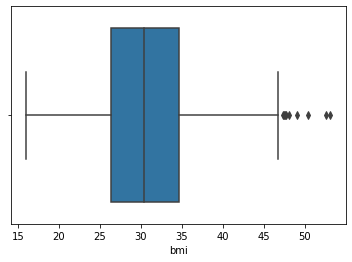

In [19]:
sns.boxplot(data1["bmi"])

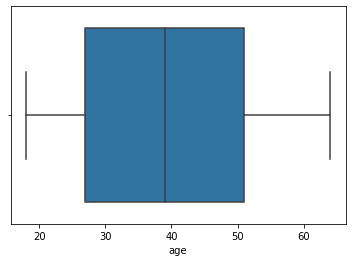

In [20]:
sns.boxplot(data1["age"])

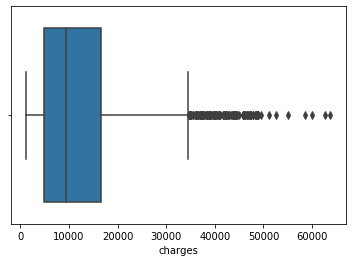

In [21]:
sns.boxplot(data1["charges"])

In [22]:
#Distribution of categorical column.
data_cat=data[["sex","smoker","region","children"]]
data_cat

,sex,smoker,region,children
0,female,yes,southwest,0
1,male,no,southeast,1
2,male,no,southeast,3
3,male,no,northwest,0
4,male,no,northwest,0
...,...,...,...,...
1333,male,no,northwest,3
1334,female,no,northeast,0
1335,female,no,southeast,0
1336,female,no,southwest,0


In [23]:
data_cat["smoker"].count()

1337

In [24]:
data_cat["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

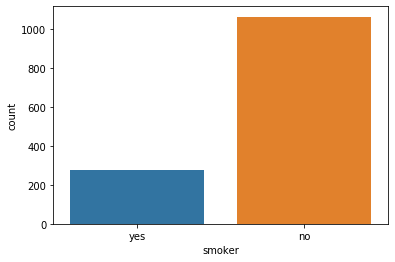

In [25]:
sns.countplot("smoker",data=data_cat)

In [26]:
data_cat["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

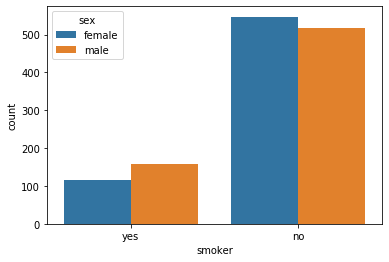

In [27]:
sns.countplot(x="smoker",hue="sex",data=data_cat)

In [28]:
pd.pivot_table(data_cat,index=["region","sex"],columns=["smoker"],aggfunc=len)

children    
smoker                 no yes
region    sex                
northeast female      132  29
          male        125  38
northwest female      135  29
          male        131  29
southeast female      139  36
          male        134  55
southwest female      141  21
          male        126  37

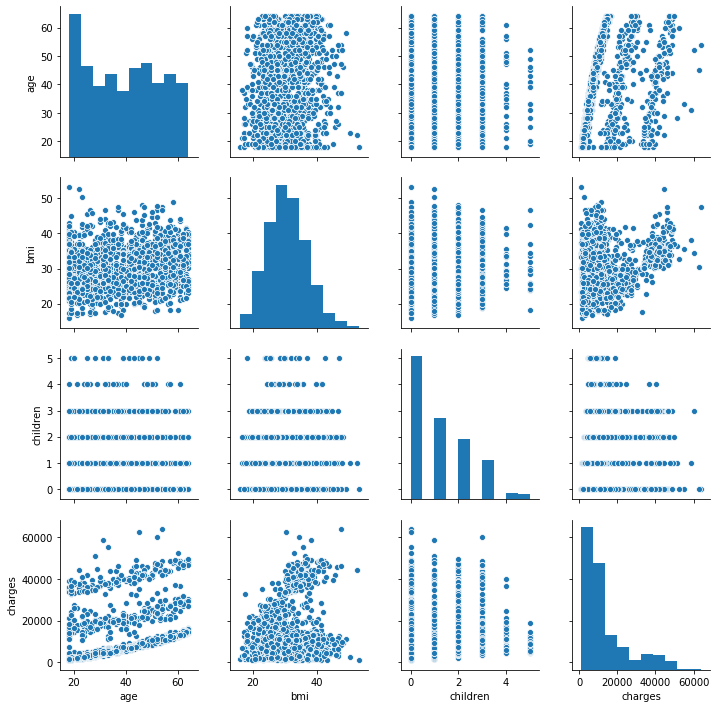

In [29]:
#Pair plot that includes all the columns of the data frame.
sns.pairplot(data)

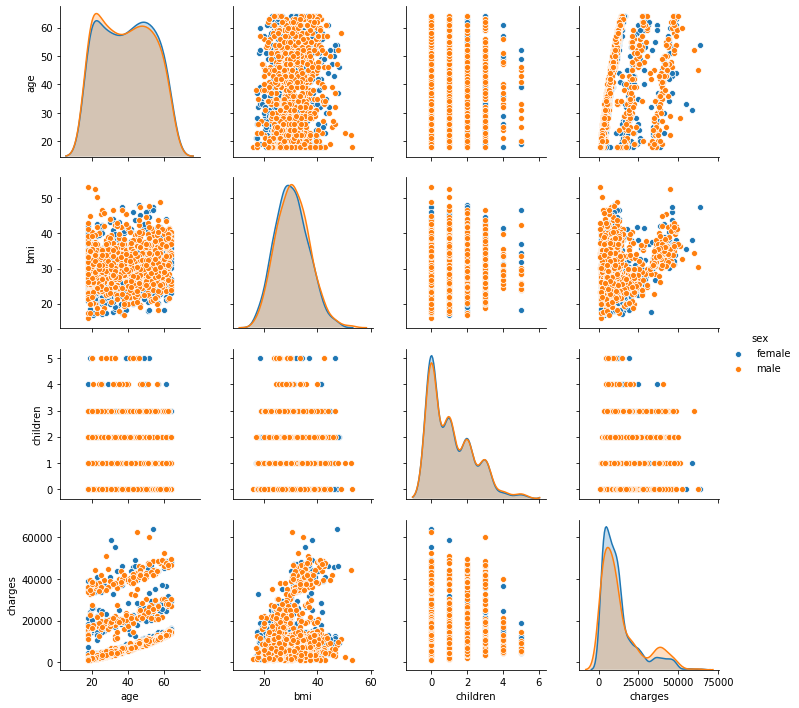

In [30]:
sns.pairplot(data=data,hue='sex')

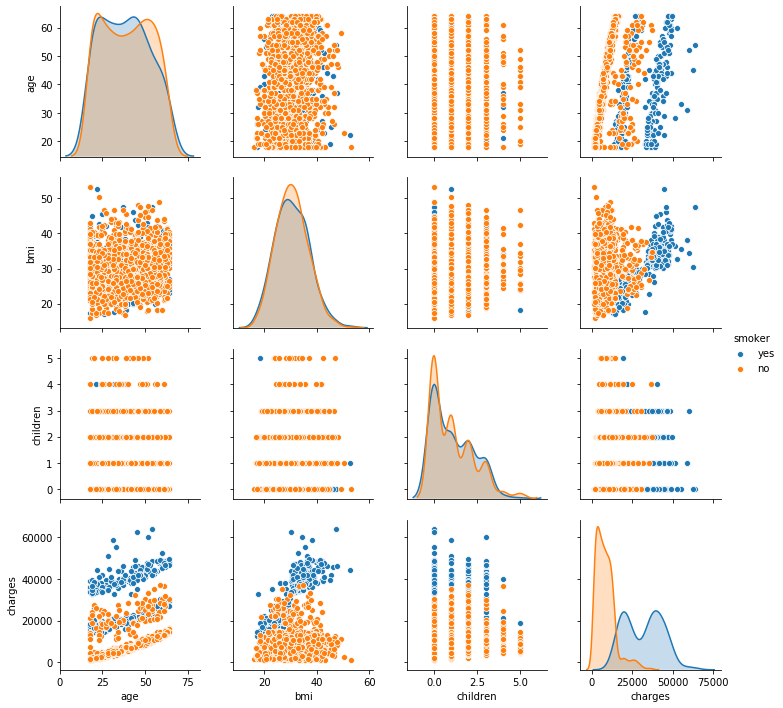

In [31]:
sns.pairplot(data=data,hue='smoker')

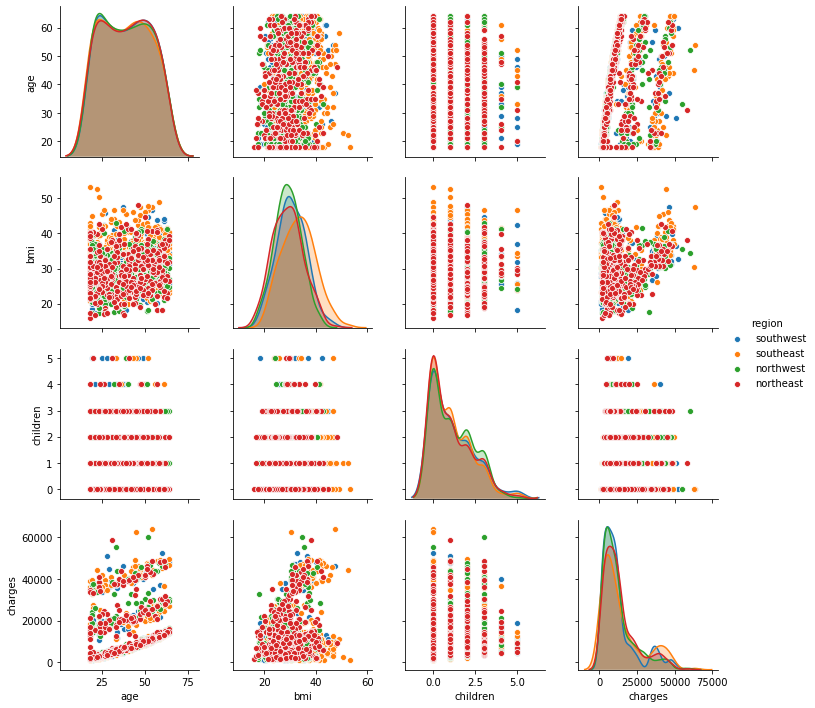

In [32]:
sns.pairplot(data=data,hue='region')

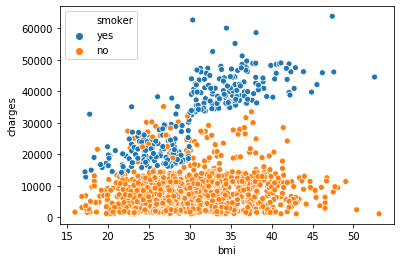

In [33]:
sns.scatterplot(x=data["bmi"], y=data["charges"], hue=data["smoker"])

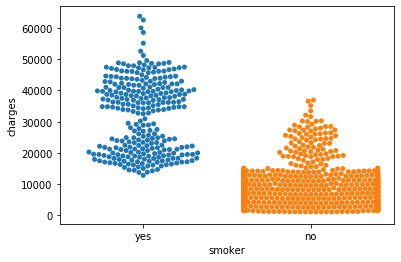

In [34]:
sns.swarmplot(x=data["smoker"],y=data["charges"])

This above plot shows that smokers billing amount is more than the non-smoker.

#### Do charges of people who smoke differ significantly from the people who don't ?

In [35]:
import scipy.stats as stats

In [45]:
Ho="Charges of smoker and non-smoker are same" #Null hypothesis

Ha="charges of smoker and non-smoker are not same" #Alternative hypothesis

In [46]:
x=np.array(data[data["smoker"]=="yes"].charges)
y=np.array(data[data["smoker"]=="no"].charges)

In [47]:
t_stat,p_value=stats.ttest_ind(x,y,axis=0)

t_stat,p_value

(46.64479459840305, 1.4067220949376498e-282)

In [48]:
#significant level=0.05
if p_value<0.05:
    print(Ha)
else:
    print(Ho)
    

charges of smoker and non-smoker are not same


####  Does bmi of males differ significantly from that of females?

In [49]:
Ho="bmi of male and female are same" #Null hypothesis

Ha="bmi of male and female are not same" #Alternative hypothesis

In [50]:
x=np.array(data[data["sex"]=="male"].bmi)
y=np.array(data[data["sex"]=="female"].bmi)

In [51]:
t_stat,p_value=stats.ttest_ind(x,y,axis=0)

t_stat,p_value

(1.6970672301298684, 0.08991704324931137)

In [52]:
#significant level=0.05
if p_value<0.05:
    print(Ha)
else:
    print(Ho)

bmi of male and female are same
